In [6]:
# 클러스터 모듈 import
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 시각화 모듈 import
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 데이터 핸들링 모듈 import
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_excel('./data_per.xlsx', engine='openpyxl', header=0)
df = pd.DataFrame(df)

df = df.iloc[1:,1:]
df.head(3)

,면적당범죄발생건수,구별면적,면적당여성1인가구수,면적당가로등수,면적당CCTV수,면적당치안센터수,면적당편의점갯수,면적당여성안심지킴이집수
1,160.85,23.91,532.37,368.80,55.63,1.05,8.49,1.25
2,434.44,9.96,1144.68,858.43,106.83,2.01,23.69,3.71
3,151.49,21.87,866.21,358.39,68.54,0.59,9.24,1.55


In [7]:
df = df.drop(df[['구별면적']], axis =1)
df.head()

,면적당범죄발생건수,면적당여성1인가구수,면적당가로등수,면적당CCTV수,면적당치안센터수,면적당편의점갯수,면적당여성안심지킴이집수
1,160.85,532.37,368.80,55.63,1.05,8.49,1.25
2,434.44,1144.68,858.43,106.83,2.01,23.69,3.71
3,151.49,866.21,358.39,68.54,0.59,9.24,1.55
4,148.99,1243.36,371.65,66.43,0.95,12.10,0.89
5,235.11,1798.30,287.69,184.47,0.76,16.59,1.17


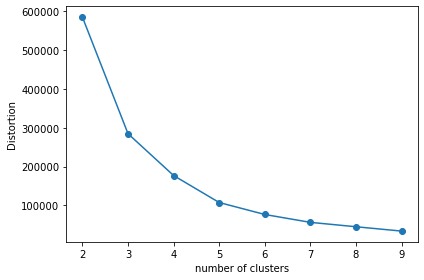

In [60]:
# 엘보우차트
distortion = []
for i in range(2,10) :
    km = KMeans(n_clusters=i, 
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df)
    distortion.append(km.inertia_)
plt.plot(range(2,10), distortion, marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

NameError: name 'y_km' is not defined

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [9]:
print(kmeans.labels_)

print(kmeans.predict(df))
y_km = kmeans.predict(df)
df['cluster']=kmeans.labels_

[3 4 0 2 1 1 2 2 0 0 0 0 2 2 2 0 2 2 2 1 1 3 0 2 0]
[3 4 0 2 1 1 2 2 0 0 0 0 2 2 2 0 2 2 2 1 1 3 0 2 0]


In [25]:
df['cluster']=kmeans.labels_

In [55]:
df['면적당범죄발생건수'] = df.target
df_result = df.groupby(['면적당범죄발생건수','cluster'])['면적당범죄발생건수'].count()
print(df_result)

AttributeError: 'DataFrame' object has no attribute 'target'

In [9]:
df.head()

,면적당범죄발생건수,구별면적,면적당여성1인가구수,면적당가로등수,면적당CCTV수,면적당치안센터수,면적당편의점갯수,면적당여성안심지킴이집수,cluster
1,160.85,23.91,532.37,368.80,55.63,1.05,8.49,1.25,4
2,434.44,9.96,1144.68,858.43,106.83,2.01,23.69,3.71,3
3,151.49,21.87,866.21,358.39,68.54,0.59,9.24,1.55,2
4,148.99,16.86,1243.36,371.65,66.43,0.95,12.10,0.89,0
5,235.11,17.06,1798.30,287.69,184.47,0.76,16.59,1.17,1


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

df['pca_x'] = pca_transformed[:,0:2]
df['pca_y'] = pca_transformed[:,2:]
df.head(3)

ValueError: Wrong number of items passed 2, placement implies 1

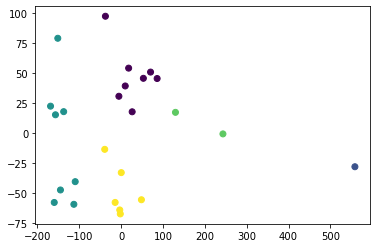

In [57]:
plt.scatter(x=df.loc[:, 'pca_x'], y=df.loc[:, 'pca_y'], c=df['cluster']) 

In [42]:
# 엘보우차트
distortion = []
for i in range(2,10) :
    km = KMeans(n_clusters=i, 
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df)
    distortion.append(km.inertia_)

n_clusters = 2 The average silhouette_score : 0.6445088854997131
n_clusters = 3 The average silhouette_score : 0.45639771951317043
n_clusters = 4 The average silhouette_score : 0.44204544006535346
n_clusters = 5 The average silhouette_score : 0.4534385073426968
n_clusters = 6 The average silhouette_score : 0.45058046464657187
n_clusters = 7 The average silhouette_score : 0.41563486993839627
n_clusters = 8 The average silhouette_score : 0.4068766092646009
n_clusters = 9 The average silhouette_score : 0.4051383414233448


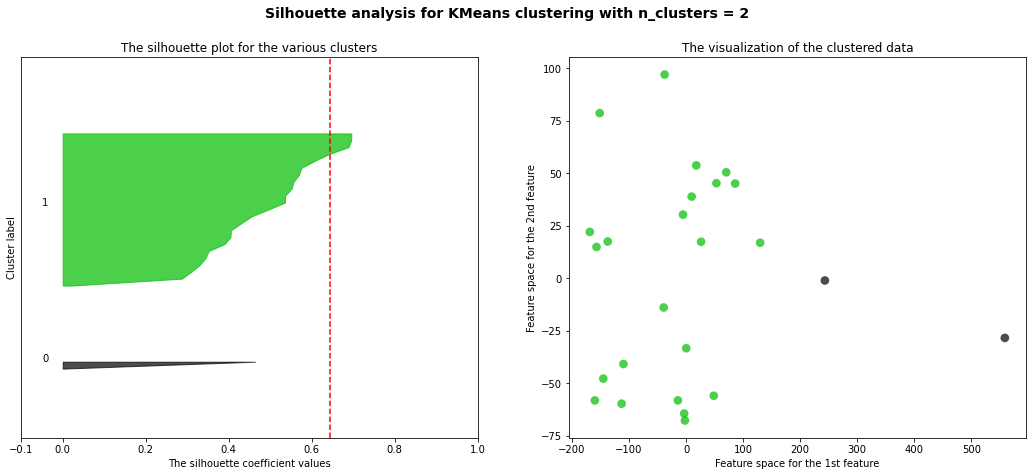

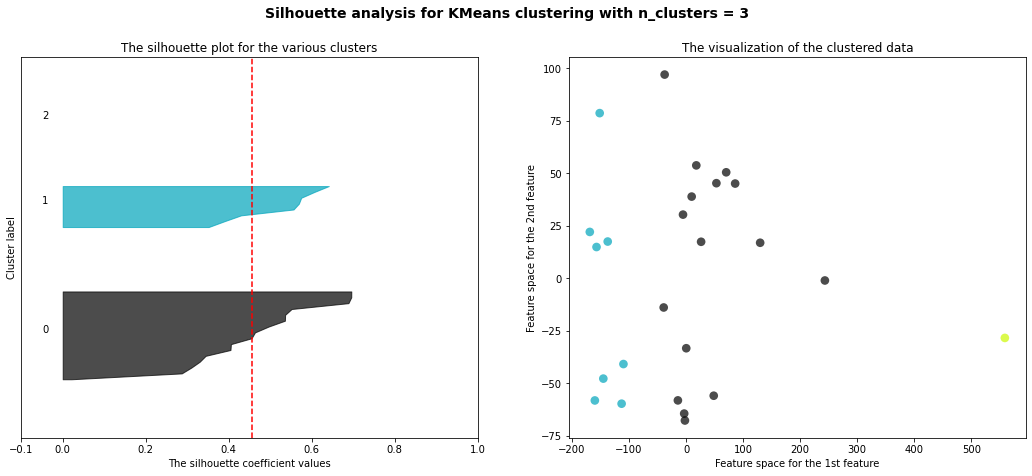

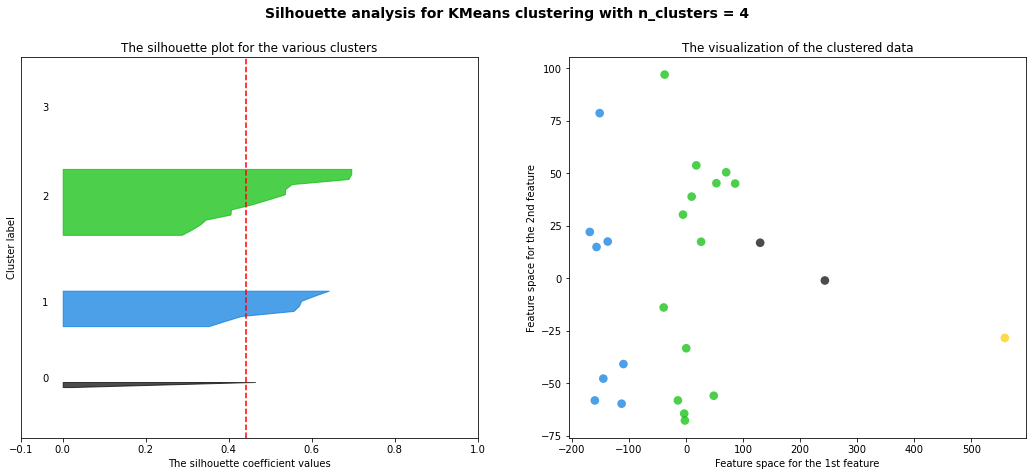

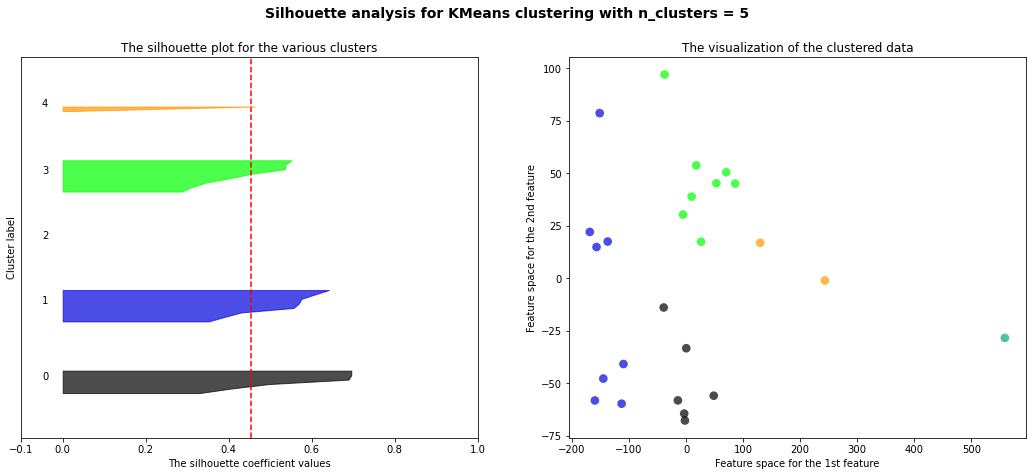

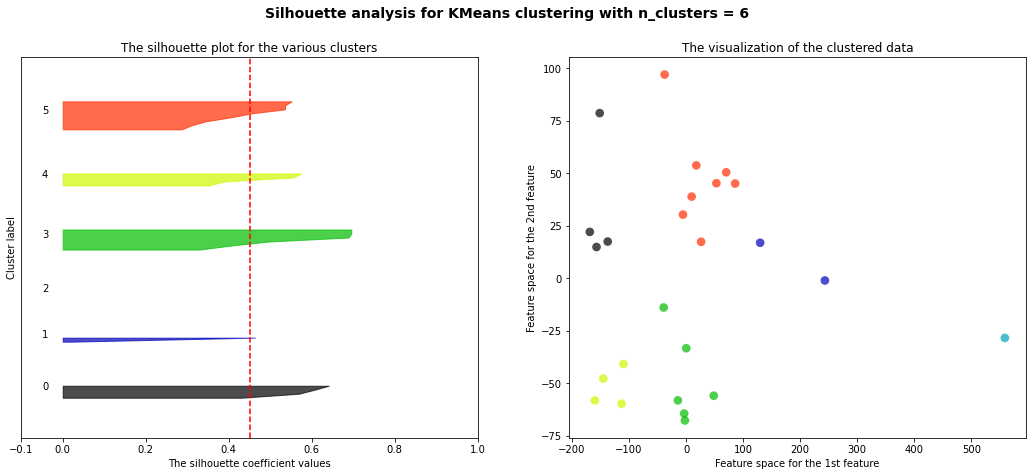

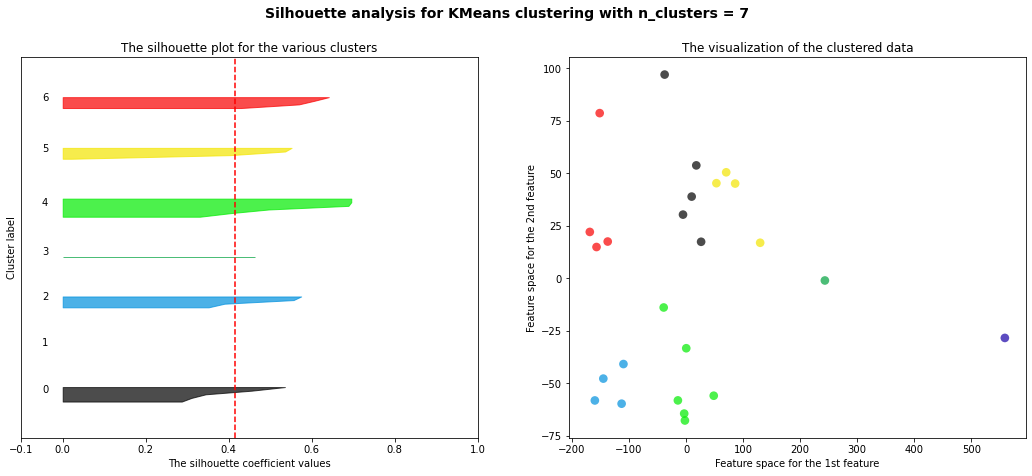

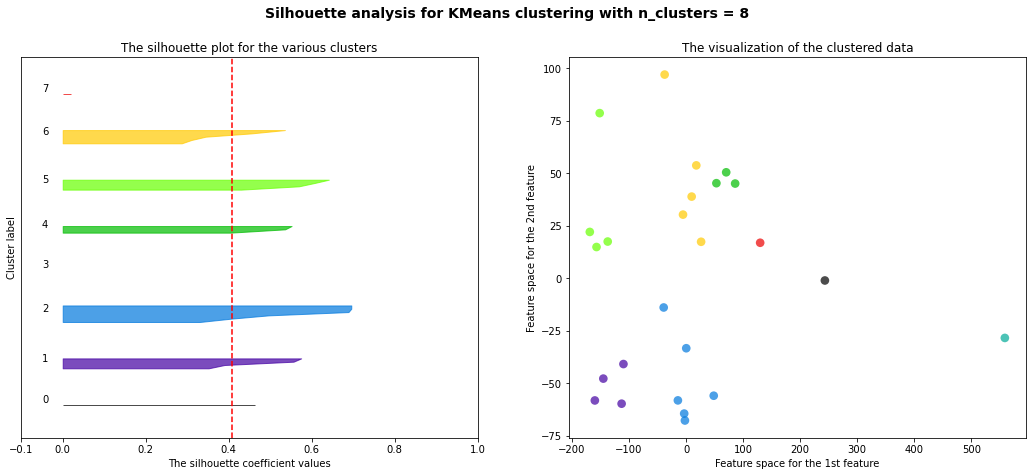

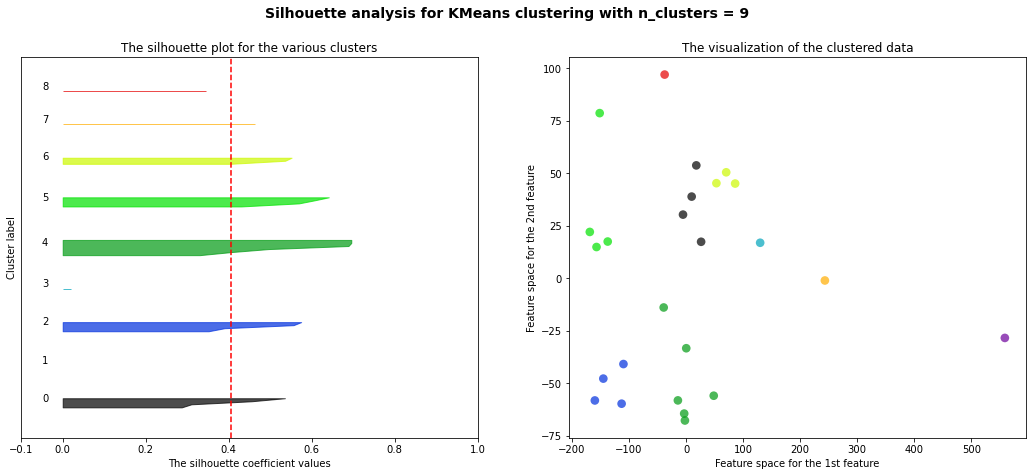

In [61]:
# 클러스터 개수
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    # 시각화 표현 { 좌 : 실루엣 계수, 우 : 그래프 }
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # 실루엣 계수 : 음수인 경우 0.1 부터 양수 1까지 표현 범위 설정
    ax1.set_xlim([-0.1, 1]) 
    # 계수 간 적절한 간격 확보
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # for문을 통해 각 클러스터 구현
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # 클러스터 당 평균 실루엣계수 측정
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("n_clusters =", n_clusters, "The average silhouette_score :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df, y_km)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # 클러스터 번호 라벨이 중앙에 모이게 조정
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # 평균 실루엣 계수 값 시각화
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2. 클러스터 시각화
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df.iloc[:, -2], df.iloc[:, -1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터 라벨링
#     centers = clusterer.cluster_centers_
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

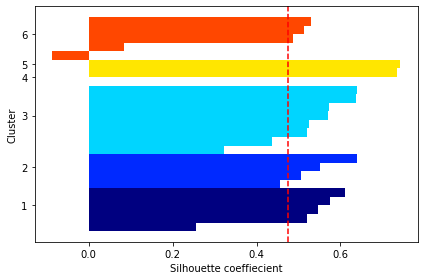

In [44]:
# 실루엣 계수 정리 
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
            edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coeffiecient')

plt.tight_layout()
plt.show()

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_excel('./data_standard.xlsx', engine='openpyxl', header=0)
df = pd.DataFrame(df)

df

,지역,1인가구수,면적당1인가구수,여성1인가구수,면적당여성1인가구수,5대범죄발생건수,면적당범죄발생건수,가로등수,면적당가로등수,CCTV수,면적당CCTV수,구별면적,경찰서수,지구대파출소치안센터수,전체치안센터수,면적당치안센터수,편의점갯수,면적당편의점갯수,target
0,합계,1299787,2147.59,688226,1137.13,103668,171.29,283974,469.20,67361,111.30,605.23,31,410,441,0.73,7251,11.98,5
1,종로구,24671,1031.83,12729,532.37,3846,160.85,8818,368.80,1330,55.63,23.91,2,23,25,1.05,203,8.49,5
2,중구,22078,2216.67,11401,1144.68,4327,434.44,8550,858.43,1064,106.83,9.96,2,18,20,2.01,236,23.69,5
3,용산구,35148,1607.13,18944,866.21,3313,151.49,7838,358.39,1499,68.54,21.87,1,12,13,0.59,202,9.24,4
4,성동구,41488,2460.74,20963,1243.36,2512,148.99,6266,371.65,1120,66.43,16.86,1,15,16,0.95,204,12.10,2
5,광진구,58714,3441.62,30679,1798.30,4011,235.11,4908,287.69,3147,184.47,17.06,1,12,13,0.76,283,16.59,4
6,동대문구,58152,4089.45,28976,2037.69,3692,259.63,8342,586.64,2101,147.75,14.22,1,20,21,1.48,300,21.10,3
7,중랑구,52196,2821.41,26208,1416.65,4268,230.70,6521,352.49,2886,156.00,18.50,1,17,18,0.97,248,13.41,4
8,성북구,57832,2352.81,31701,1289.71,2877,117.05,5744,233.69,3368,137.02,24.58,2,24,26,1.06,268,10.90,2
9,강북구,42791,1813.18,23274,986.19,3838,162.63,4301,182.25,2430,102.97,23.60,1,14,15,0.64,211,8.94,4
